In [132]:
# import libraries
import pandas as pd   #pandas
import numpy as np    #numpy
import seaborn as sns  #for data visualization
import matplotlib.pyplot as plt   #for data visualization


In [133]:
# load dataset
df = pd.read_csv("../data/customer_churn_raw.csv")

# display setting
pd.set_option("display.max_columns", None) # by default, pandas hide some extra columns, to see all columns, use it

# show first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [134]:
# check the shape
print("Original shpae: ", df.shape)

Original shpae:  (7043, 21)


In [135]:
# remove the customerID, since it has no impact in the modeling
df.drop('customerID', axis=1, inplace=True)

In [136]:
# data types
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [137]:
#check missing values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [138]:
# convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [139]:
# check missing values after convert TotalCharges to numeric
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [140]:
# after converting to numeric, some value became null, see that rows
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [141]:
# check the data dtypes again
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [142]:
# fill the missing values of the TotalCharges
df['TotalCharges'].fillna((df['MonthlyCharges'] * df['tenure']), inplace=True)

/var/folders/ng/m4yd93hn3dd0fttqhm_f8prc0000gn/T/ipykernel_13126/1601743382.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna((df['MonthlyCharges'] * df['tenure']), inplace=True)


In [143]:
# again check the missing values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [144]:
# separate the numerical and categorical, binary (features) columns and target columns
numerical_cols = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
categorical_cols = ['InternetService','Contract','PaymentMethod']
binary_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
target = 'Churn'

print("Numerical features: ", numerical_cols)
print("Categorical features: ", categorical_cols)
print("Binary features: ", binary_cols)
print("Target: ", target)

Numerical features:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features:  ['InternetService', 'Contract', 'PaymentMethod']
Binary features:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
Target:  Churn


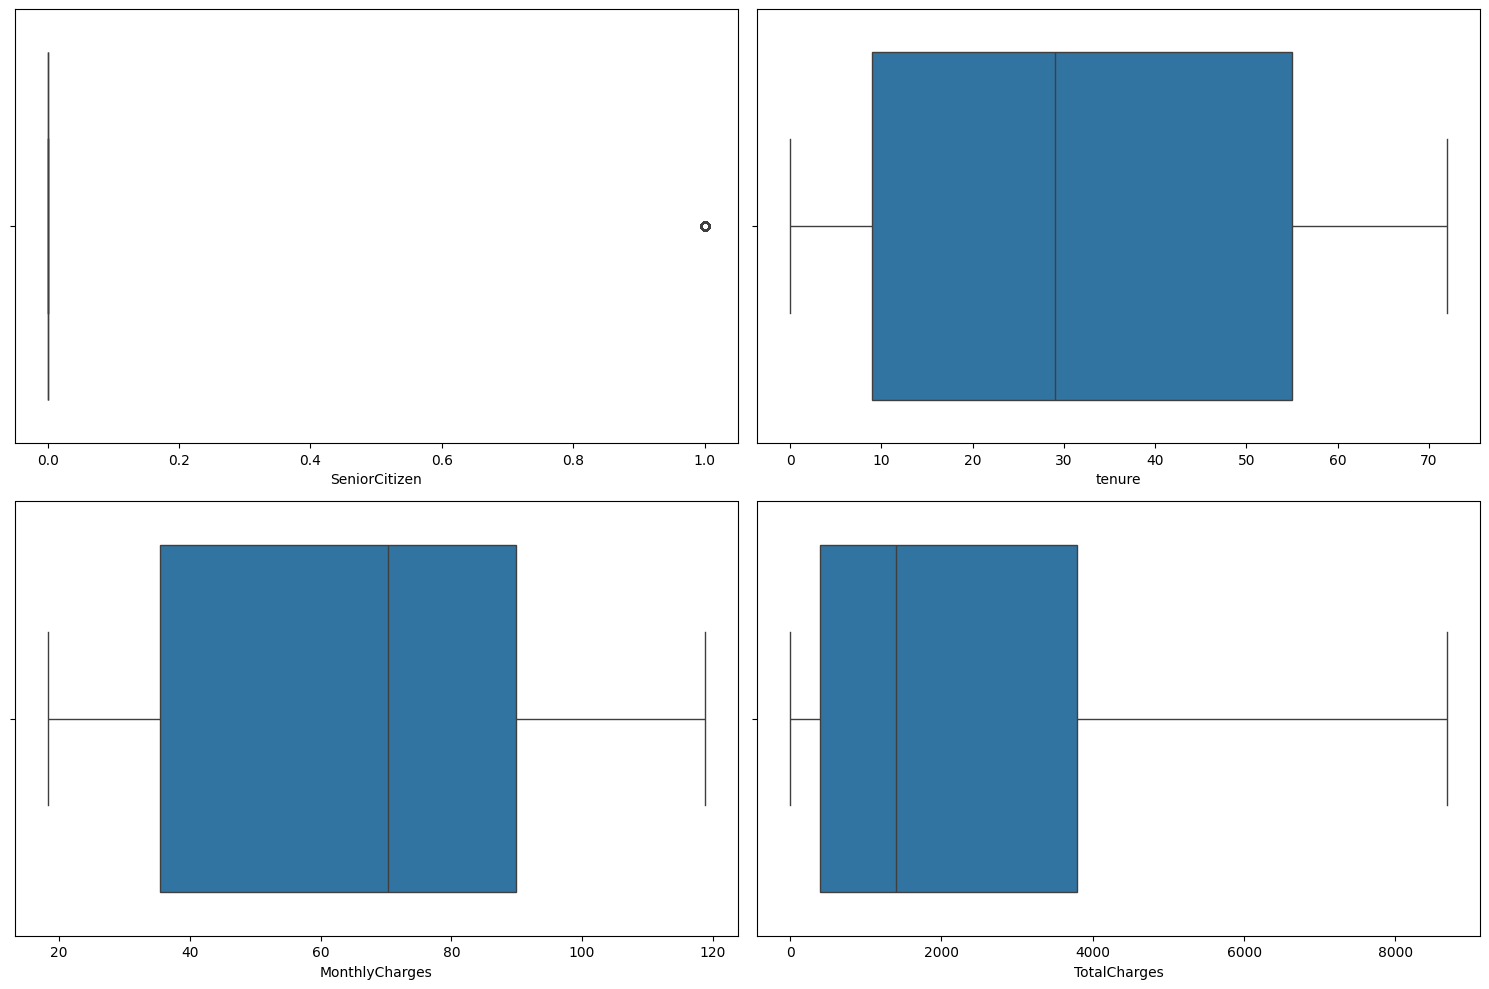

In [149]:
# check outliers of the numerical columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x = col, data = df)
    
plt.tight_layout()    
plt.savefig("../reports/figures/boxplot_numeric_features.png")
plt.show()

In [150]:
# encode target variables
df[target] = df[target].map({'No':0, 'Yes':1})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [151]:
# check unique values of numeircal featues
for col in numerical_cols:
    print(df[col].value_counts())
    print()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

TotalCharges
0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6531, dtype: int64



In [124]:
# check unique categories of categorical featues
for col in categorical_cols:
    print(df[col].value_counts())
    print()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64



In [152]:
# check unique values of binary featues
for col in binary_cols:
    print(df[col].value_counts())
    print()

gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

StreamingMo

In [153]:
replace_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in replace_cols:
    df[col] = df[col].replace('No internet service','No')

df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [154]:
# check unique values of binary featues again
for col in binary_cols:
    print(df[col].value_counts())
    print()

gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64



In [156]:
from sklearn.model_selection import train_test_split

# split the features and target
X = df.drop('Churn', axis=1)
y = df[target]

# split the data into 80% of training set and 20% of testing set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [157]:
# preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression

#num transformers
num_transformers = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# multi category column transformers
cat_transformers = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# binary column (Yes/No) transformers
bin_transformers = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary'))
])

# combine all transformers using ColumnTransformers
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformers, numerical_cols),
    ("cat", cat_transformers, categorical_cols),
    ("bin", bin_transformers, binary_cols),
])



In [158]:
# saved preprocessor, splits for modeling
import joblib
joblib.dump((X_train, X_test, y_train, y_test, preprocessor), "../models/preprocessed.pkl")
print("Preprocessing complete. Data and pipeline saved.")

Preprocessing complete. Data and pipeline saved.


In [160]:
# save the cleaned dataset
df.to_csv("../data/customer_churn_cleaned.csv", index=False)
print("Cleaned Data saved successfully")

Cleaned Data saved successfully
